**–ü–õ–ê–ù –†–ê–ë–û–¢–´**:

1. –ó–∞–≥—Ä—É–∑–∏—Ç—å –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç—å –¥–∞–Ω–Ω—ã–µ;
2. –í—ã–ø–æ–ª–Ω–∏—Ç—å —Ä–µ—Å–µ–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –ø–æ –æ–¥–Ω–æ–º—É —á–∞—Å—É –∏ –ø—Ä–æ–≤–µ—Å—Ç–∏ –∞–Ω–∞–ª–∏–∑;
3. –û–±—É—á–∏—Ç—å —Ä–∞–∑–Ω—ã–µ –º–æ–¥–µ–ª–∏, –≤—ã–±—Ä–∞–≤ –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é. –¢—Ä–µ–±–æ–≤–∞–Ω–∏–µ - –º–æ–¥–µ–ª—å –¥–æ–ª–∂–Ω–∞ –æ—à–∏–±–∞—Ç—åc—è –Ω–µ –±–æ–ª–µ–µ, —á–µ–º –Ω–∞ 48 –º–∏–Ω—É—Ç; 
4. –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞

–î–ª—è –Ω–∞—á–∞–ª–∞ –∑–∞–≥—Ä—É–∑–∏–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏:

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.simplefilter('ignore')

–ó–∞–≥—Ä—É–∑–∏–º –∏ –ø—Ä–æ—á–∏—Ç–∞–µ–º —Ñ–∞–π–ª:

In [2]:
data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])

–í—ã–≤–µ–¥–∏–º –Ω–∞ —ç–∫—Ä–∞–Ω –ø–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞:

In [3]:
data.head()

num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32

–ü–æ—Å–º–æ—Ç—Ä–∏–º –æ–±—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


–ü—Ä–∏ –∑–∞–≥—Ä—É–∑–∫–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –º—ã –∏–∑–º–µ–Ω–∏–ª–∏ —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö Datetime —Å object –Ω–∞ datetime64 –∏ —É—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –∏–Ω–¥–µ–∫—Å —Ç–∞–±–ª–∏—Ü—ã —Ä–∞–≤–Ω—ã–º —Å—Ç–æ–ª–±—Ü—É Datetime. –î–∞–Ω–Ω—ã–µ –≤ —Ç–∞–±–ª–∏—Ü–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –∑–∞ –ø–µ—Ä–∏–æ–¥ —Å 2018-03-01 –ø–æ 2018-08-31.

–ü—Ä–æ–≤–µ—Ä–∏–º, –≤ —Ö—Ä–æ–Ω–æ–ª–∏–≥–∏—á–µ—Å–∫–æ–º –ª–∏ –ø–æ—Ä—è–¥–∫–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –¥–∞—Ç–∞ –∏ –≤—Ä–µ–º—è: 

In [5]:
data.sort_index(inplace=True)
data.index.is_monotonic

True

–í—Å–µ –≤ –ø–æ—Ä—è–¥–∫–µ. –î–∞–Ω–Ω—ã–µ —É–ø–æ—Ä—è–¥–æ—á–µ–Ω—ã –≤–æ –≤—Ä–µ–º–µ–Ω–∏.

# –í—ã–≤–æ–¥

–ú—ã –∑–∞–≥—Ä—É–∑–∏–ª–∏ –∏ –ø—Ä–æ—á–∏—Ç–∞–ª–∏ —Ñ–∞–π–ª. –ü–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞. 

## –ê–Ω–∞–ª–∏–∑

–í—ã–ø–æ–ª–Ω–∏–º —Ä–µ—Å—Å–µ–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ, –≤—ã–±—Ä–∞–≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª –≤ –æ–¥–∏–Ω —á–∞—Å:

In [6]:
data=data['2018-03':'2018-08'].resample('1H').sum()

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É:

In [7]:
data.describe()

num_orders
count  4416.000000
mean     84.422781
std      45.023853
min       0.000000
25%      54.000000
50%      78.000000
75%     107.000000
max     462.000000

–í 50% —Å–ª—É—á–∞–µ–≤ —á–∏—Å–ª–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —á–∞—Å —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 78. 

–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ —Å–æ —Å–∫–æ–ª—å–∑—è—â–∏–º–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ–º –∏ —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º:

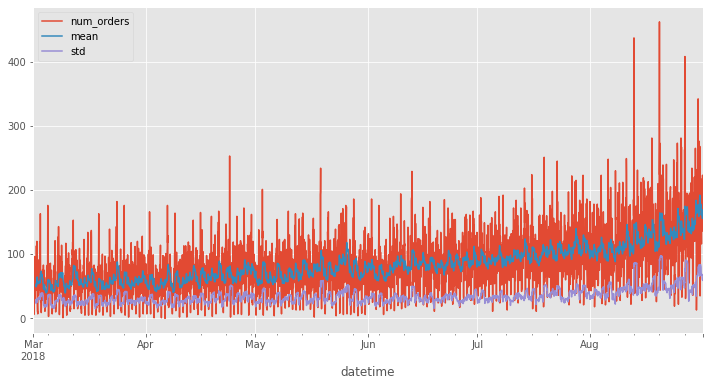

In [8]:
data_analysis = data.copy()

data_analysis['mean'] = data_analysis['num_orders'].rolling(20).mean()
data_analysis['std'] = data_analysis['num_orders'].rolling(20).std()

data_analysis.plot(figsize=(12,6))
plt.show()

–í—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —É—Å—Ç–æ–π—á–∏–≤–æ –≤–æ–∑—Ä–∞—Å—Ç–∞—é—â–∏–π —Ç—Ä–µ–Ω–¥. –° –∞–≤–≥—É—Å—Ç–∞ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è —á–∏—Å–ª–æ –∑–∞–∫–∞–∑–æ–≤ —Ç–∞–∫—Å–∏ - –≤—Ä–µ–º—è –æ–∫–æ–Ω—á–∞–Ω–∏—è –æ—Ç–ø—É—Å–∫–Ω–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞. 

–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –Ω–µ –Ω–∞—Å—Ç–æ–ª—å–∫–æ —Å–∏–ª—å–Ω–æ. –í —Ç–æ –≤—Ä–µ–º—è, –∫–∞–∫ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—á–µ–≤–∏–¥–Ω–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

–†–∞–∑–±–µ—Ä—ë–º —Ç—Ä–µ–Ω–¥—ã –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å:

In [9]:
decomposed = seasonal_decompose(data['num_orders'])

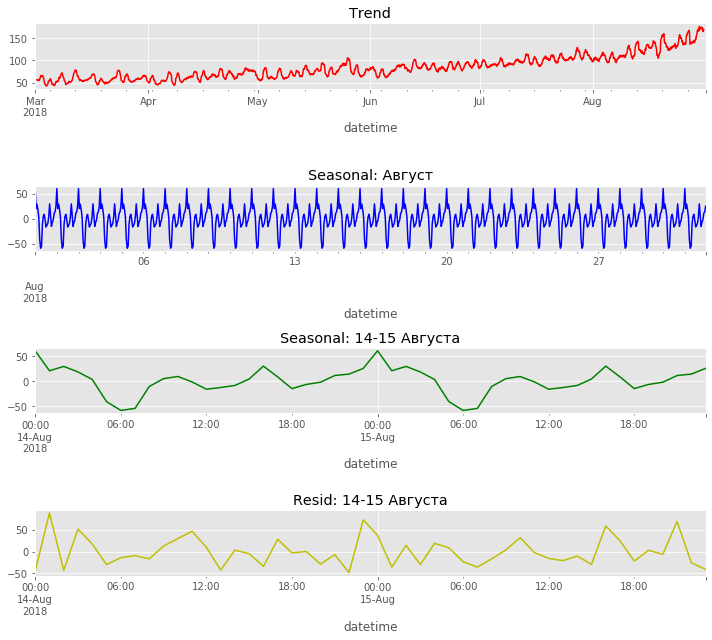

In [10]:
plt.figure(figsize=(10, 9))

plt.subplot(411)
decomposed.trend['2018-03':'2018-08'].plot(ax=plt.gca(), color = 'r')
plt.title('Trend')

plt.subplot(412)
decomposed.seasonal['2018-08':'2018-08'].plot(ax=plt.gca(), color = 'b')
plt.title('Seasonal: –ê–≤–≥—É—Å—Ç')

plt.subplot(413)
decomposed.seasonal['2018-08-14':'2018-08-15'].plot(ax=plt.gca(), color = 'g')
plt.title('Seasonal: 14-15 –ê–≤–≥—É—Å—Ç–∞')

plt.subplot(414)
decomposed.resid['2018-08-14':'2018-08-15'].plot(ax=plt.gca(), color = 'y')
plt.title('Resid: 14-15 –ê–≤–≥—É—Å—Ç–∞')

plt.tight_layout()

–ì—Ä–∞—Ñ–∏–∫ —Ç—Ä–µ–Ω–¥–∞ –æ—Ç—Ä–∞–∂–∞–µ—Ç —Å—Ç–∞–±–∏–ª—å–Ω–æ–µ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –∑–∞–∫–∞–∑–æ–≤ —Ç–∞–∫—Å–∏ –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –≤—Å–µ–≥–æ –ø–µ—Ä–∏–æ–¥–∞. 

–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –¥–ª—è –±–æ–ª–µ–µ —É–¥–æ–±–Ω–æ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤—ã–≤–µ–¥–µ–Ω–∞ –≤ –¥–≤—É—Ö –¥–∏–∞–ø–∞–∑–æ–Ω–∞—Ö: –∑–∞ –≤–µ—Å—å –∞–≤–≥—É—Å—Ç –∏ –∑–∞ –ø–µ—Ä–∏–æ–¥ 14-15 –∞–≤–≥—É—Å—Ç–∞. –ì—Ä–∞—Ñ–∏–∫ –º–µ—Å—è—Ü–∞ –æ—Ç—Ä–∞–∂–∞–µ—Ç —á–µ—Ç–∫—É—é —Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç—å –∑–∞–∫–∞–∑–æ–≤ –∏–∑–æ –¥–Ω—è –≤ –¥–µ–Ω—å. 

–ù–∞–∏–±–æ–ª—å—à–∏–π –∏–Ω—Ç–µ—Ä–µ—Å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –≥—Ä–∞—Ñ–∏–∫ –∑–∞–∫–∞–∑–∞ —Ç–∞–∫—Å–∏ –≤ —Ç–µ—á–µ–Ω–∏–µ —Å—É—Ç–æ–∫. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–µ–≥–æ –±–ª–∏–∂–µ:

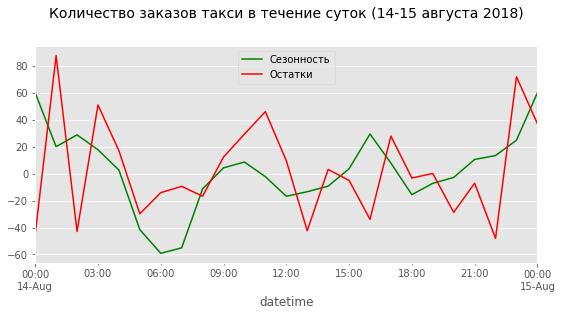

In [11]:
plt.title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ —Ç–∞–∫—Å–∏ –≤ —Ç–µ—á–µ–Ω–∏–µ —Å—É—Ç–æ–∫ (14-15 –∞–≤–≥—É—Å—Ç–∞ 2018)', y=1.1, fontsize=14)
decomposed.seasonal['2018-08-14-00:00:00':'2018-08-15-00:00:00'].plot(figsize=(9,4), color='g', label='–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å')
decomposed.resid['2018-08-14-00:00:00':'2018-08-15-00:00:00'].plot(figsize=(9,4), color='r', label='–û—Å—Ç–∞—Ç–∫–∏')
plt.legend()
plt.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –≤—ã–∑–æ–≤–æ–≤ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ 12 —á–∞—Å–æ–≤ –Ω–æ—á–∏. –°–ø–∞–¥ - 6 —É—Ç—Ä–∞. –ï—â–µ –æ–¥–∏–Ω –ø–∏–∫ –Ω–∞–±–ª—é–¥–∞–µ–º –ø—Ä–∏–º–µ—Ä–Ω–æ –≤ 16:00. –ü–æ –æ—Å—Ç–∞—Ç–∫–∞–º –≤–∏–¥–Ω–æ, –∫–∞–∫ –º–Ω–æ–≥–æ –≤—ã–±—Ä–æ—Å–æ–≤.

# –í—ã–≤–æ–¥

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –∞–Ω–∞–ª–∏–∑–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –±—ã–ª–æ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ —Å–ª–µ–¥—É—é—â–µ–µ:

1. –°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ —Ç–∞–∫—Å–∏ –≤ —á–∞—Å —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 78; 
2. –ù–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –≤—Å–µ–≥–æ –∏—Å—Å–ª–µ–¥—É–µ–º–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è –∫ —É–≤–µ–ª–∏—á–µ–Ω–∏—é —á–∏—Å–ª–∞ –∑–∞–∫–∞–∑–æ–≤ - —Ä–æ—Å—Ç —Ç—Ä–µ–Ω–¥–∞;
3. –î–∞–Ω–Ω—ã–µ –æ—Ç—Ä–∞–∂–∞—é—Ç "—Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å" : –Ω–∞–∏–±–æ–ª—å—à–∞—è –∑–∞–≥—Ä—É–∂–µ–Ω–Ω–æ—Å—Ç—å –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ 12 —á–∞—Å–æ–≤ –Ω–æ—á–∏ –∏ 4-5 —á–∞—Å–æ–≤ –≤–µ—á–µ—Ä–∞, –Ω–∞–∏–º–µ–Ω—å—à–∞—è - –≤ 6-7 —É—Ç—Ä–∞.

## –û–±—É—á–µ–Ω–∏–µ

–î–ª—è –æ–±—É—á–µ–Ω–∏—è –≤—ã–±–µ—Ä–µ–º –ø—Ä–æ—Å—Ç–æ–π –∞–ª–≥–æ—Ä–∏—Ç–º:

* `LinearRegression`

–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∞–Ω—Å–∞–º–±–ª–∏–µ–≤—ã—Ö:
*  `RandomForestRegressor`
* `CatBoostRegressor`
* `LGBMRegressor`

–ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è. 

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 

In [12]:
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    data['minute'] = data.index.minute
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

–ü–æ–¥–±–µ—Ä–µ–º –∞—Ä–≥—É–º–µ–Ω—Ç—ã —Ñ—É–Ω–∫—Ü–∏–∏ —Ç–∞–∫, —á—Ç–æ–±—ã –¥–æ—Å—Ç–∏—á—å –∫–∞—á–µ—Å—Ç–≤–∞ –º–µ—Ç—Ä–∏–∫–∏ –Ω–µ –º–µ–Ω–µ–µ 48:

In [13]:
make_features(data, 20, 24)

–†–∞–∑–æ–±—å–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏:

In [14]:
train, supp = train_test_split(data, test_size=.25, shuffle=False)
valid, test = train_test_split(supp, test_size=.40, shuffle=False)

In [15]:
train.dropna(inplace=True)

In [16]:
print('–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏:', train.shape[0])
print('–†–∞–∑–º–µ—Ä –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏:', valid.shape[0])
print('–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏:', test.shape[0]) 

–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: 3288
–†–∞–∑–º–µ—Ä –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: 662
–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: 442


–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ 10% –æ—Ç –∏—Å—Ö–æ–¥–Ω–æ–π. –†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å —Å–æ–±–ª—é–¥–µ–Ω–∞ –≤–µ—Ä–Ω–æ.

–ù–∞–ø–µ—á–∞—Ç–∞–µ–º –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–µ –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏–Ω–¥–µ–∫—Å–æ–≤ –≤—ã–±–æ—Ä–æ–∫, —á—Ç–æ–±—ã —É–±–µ–¥–∏—Ç—å—Å—è –≤ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç–∏ –¥–µ–ª–µ–Ω–∏—è:

In [17]:
print(train.index.min(), train.index.max())
print(valid.index.min(), valid.index.max())
print(test.index.min(), test.index.max())

2018-03-02 00:00:00 2018-07-16 23:00:00
2018-07-17 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


–í—Å–µ –≤ –ø–æ—Ä—è–¥–∫–µ, –¥–∞–Ω–Ω—ã–µ —Ä–∞–∑–±–∏—Ç—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ.

–î–ª—è –∫–∞–∂–¥–æ–π –≤—ã–±–æ—Ä–∫–∏ –æ–ø—Ä–µ–¥–µ–ª–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫:

In [18]:
X_train = train.drop(['num_orders'], axis=1)
X_valid = valid.drop(['num_orders'], axis=1)
X_test = test.drop(['num_orders'], axis=1)

y_train = train['num_orders']
y_valid = valid['num_orders']
y_test = test['num_orders']

–ü—Ä–∏—Å—Ç—É–ø–∏–º –∫ –æ–±—É—á–µ–Ω–∏—é.

### LinearRegression()

In [19]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
LR_preds = LR_model.predict(X_valid)
LR_rmse = mean_squared_error(y_valid, LR_preds)**0.5
print('RMSE: {:.2f}'.format(LR_rmse))

RMSE: 34.92


### RandomForestRegressor()

In [20]:
RF_model=RandomForestRegressor(max_depth=8, n_estimators=300)
RF_model.fit(X_train, y_train)
RF_preds = RF_model.predict(X_valid)
RF_rmse = mean_squared_error(y_valid, RF_preds)**0.5
print('RMSE: {:.2f}'.format(RF_rmse))

RMSE: 33.18


### CatBoostRegressor()

In [21]:
Cat_model = CatBoostRegressor(depth=6, iterations=300, learning_rate=0.05, loss_function='RMSE',  verbose=0)
Cat_model.fit(X_train, y_train)
Cat_preds = Cat_model.predict(X_valid)
Cat_rmse = mean_squared_error(y_valid, Cat_preds)**0.5
print('RMSE: {:.2f}'.format(Cat_rmse))

RMSE: 31.75


### LGBMRegressor()

In [22]:
LG_model = LGBMRegressor(max_depth=6, n_estimators=300, learning_rate = 0.05, objective='RMSE', verbose=0)
LG_model.fit(X_train, y_train)
LG_preds = LG_model.predict(X_valid)
LG_rmse = mean_squared_error(y_valid, LG_preds).mean()**0.5
print('RMSE: {:.2f}'.format(LG_rmse))

RMSE: 30.86


–û—Ü–µ–Ω–∏–º –º–æ–¥–µ–ª—å –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ —Å –ø–æ–º–æ—â—å—é –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–æ–≤–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏–µ  ùë•(ùë°)  –ø—Ä–µ–¥—ã–¥—É—â–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º —Ä—è–¥–∞  ùë•(ùë°‚àí1):

In [23]:
pred_previous = valid.shift()
pred_previous.iloc[0]= train.iloc[train.shape[0]-1] 
pred_valid_rmse = mean_squared_error(valid, pred_previous)**0.5
print('RMSE: {:.2f}'.format(pred_valid_rmse))

RMSE: 40.30


RMSE –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–µ –¥–∞–Ω–Ω–æ–≥–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ - –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–æ–π–¥–µ–Ω–∞.

–í—ã–≤–µ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ –æ–¥–Ω—É —Ç–∞–±–ª–∏—Ü—É:

In [24]:
rmse_valid = pd.DataFrame([pred_valid_rmse, LR_rmse, RF_rmse,  Cat_rmse, LG_rmse],
                       columns = ['RMSE_valid'], 
                       index = ['Baseline','LinearRegressor','RandomForestRegressor', 
                                'CatBoostRegressor', 'LGBMRegressor']).sort_values(by='RMSE_valid')
rmse_valid

RMSE_valid
LGBMRegressor           30.863485
CatBoostRegressor       31.753390
RandomForestRegressor   33.175606
LinearRegressor         34.915960
Baseline                40.302132

–° –≤—ã–±—Ä–∞–Ω–Ω—ã–º–∏ –∞—Ä–≥—É–º–µ–Ω—Ç–∞–º–∏ —Ñ—É–Ω–∫—Ü–∏–∏ *make_features()* –∑–Ω–∞—á–µ–Ω–∏–µ RMSE < 48 –ø–æ–ª—É—á–∏–ª–∏ –≤—Å–µ –º–æ–¥–µ–ª–∏. –ù–∞–∏–ª—É—á—à–µ–π –æ–∫–∞–∑–∞–ª–∞—Å—å –º–æ–¥–µ–ª—å LGBMRegressor.

# –í—ã–≤–æ–¥

–î–ª—è –æ–±—É—á–µ–Ω–∏—è –±—ã–ª–æ –≤—ã–±—Ä–∞–Ω–æ 4 –∞–ª–≥–æ—Ä–∏—Ç–º–∞. –ë—ã–ª–∞ –Ω–∞–ø–∏—Å–∞–Ω–∞ —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ü–æ–¥–æ–±—Ä–∞–Ω—ã–µ –¥–ª—è –Ω–µ–µ –∞—Ä–≥—É–º–µ–Ω—Ç—ã –ø–æ–∑–≤–æ–ª–∏–ª–∏ –ø–æ–ª—É—á–∏—Ç—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∏ –Ω–∏–∂–µ —Ç—Ä–µ–±—É–µ–º–æ–≥–æ (rmse=48). –ü—Ä–∏ —ç—Ç–æ–º –ª—É—á—à–µ –≤—Å–µ–≥–æ —Å–µ–±—è –ø–æ–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å LGBMRegressor.

## –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ

–ü—Ä–æ–≤–µ—Ä–∏–º –º–æ–¥–µ–ª–∏ —Å –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:

### LinearRegression()

In [25]:
LR_test = LinearRegression()
LR_test.fit(X_train, y_train)
LR_test_preds = LR_test.predict(X_test)
LR_test_rmse = mean_squared_error(y_test, LR_test_preds)**0.5
print('RMSE: {:.2f}'.format(LR_test_rmse))

RMSE: 47.39


### RandomForestRegressor()

In [26]:
RF_test = RandomForestRegressor(max_depth=8, n_estimators=300)
RF_test.fit(X_train, y_train)
RF_test_preds = RF_test.predict(X_test)
RF_test_rmse = mean_squared_error(y_test, RF_test_preds)**0.5
print('RMSE: {:.2f}'.format(RF_test_rmse))

RMSE: 59.26


### CatBoostRegressor()

In [27]:
Cat_test = CatBoostRegressor(depth=6, iterations=300, learning_rate=0.05, loss_function='RMSE',  verbose=0)
Cat_test.fit(X_train, y_train)
Cat_test_preds = Cat_test.predict(X_test)
Cat_test_rmse = mean_squared_error(y_test, Cat_test_preds)**0.5
print('RMSE: {:.2f}'.format(Cat_test_rmse))

RMSE: 58.43


### LGBMRegressor()

In [28]:
LG_test = LGBMRegressor(max_depth=6, n_estimators=300, learning_rate = 0.05, objective='RMSE', verbose=0)
LG_test.fit(X_train, y_train)
LG_test_preds = LG_test.predict(X_test)
LG_test_rmse = mean_squared_error(y_test, LG_test_preds).mean()** 0.5
print('RMSE: {:.2f}'.format(LG_test_rmse))

RMSE: 56.58


–û—Ü–µ–Ω–∏–º –º–æ–¥–µ–ª–∏ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ: 

In [29]:
pred_previous = y_test.shift()
pred_previous.iloc[0]= y_train.iloc[y_train.shape[0]-1] 
pred_test_rmse = mean_squared_error(y_test, pred_previous)**0.5
print('RMSE: {:.2f}'.format(pred_test_rmse))

RMSE: 58.85


–í—ã–≤–µ–¥–∏–º –æ–±—â—É—é —Ç–∞–±–ª–∏—Ü—É —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏:

In [30]:
rmse_table = pd.DataFrame(data = [[LR_rmse,LR_test_rmse], [RF_rmse, RF_test_rmse], 
                                  [Cat_rmse,  Cat_test_rmse], [LG_rmse,LG_test_rmse]],                            
                       columns = ['RMSE_valid', 'RMSE_test'], 
                       index = ['LinearRegressor','RandomForestRegressor', 
                                'CatBoostRegressor', 'LGBMRegressor'])
rmse_table

RMSE_valid  RMSE_test
LinearRegressor         34.915960  47.393674
RandomForestRegressor   33.175606  59.260453
CatBoostRegressor       31.753390  58.428205
LGBMRegressor           30.863485  56.583902

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ. –í—Å–µ –º–æ–¥–µ–ª–∏, –∫—Ä–æ–º–µ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –ø–æ–∫–∞–∑–∞–ª–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –ø—Ä–µ–≤—ã—à–∞—é—â–∏–π –¥–æ–ø—É—Å—Ç–∏–º—ã–π —Å –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ–º –≤ 48 –∑–∞–∫–∞–∑–æ–≤/—á–∞—Å. –ú–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –æ–∫–∞–∑–∞–ª–∞—Å—å –Ω–∞ –≥—Ä–∞–Ω–∏ —ç—Ç–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è.   

## –û–±—â–∏–π –≤—ã–≤–æ–¥

–í —Ä–∞–º–∫–∞—Ö –¥–∞–Ω–Ω–æ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞:

* –±—ã–ª–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–æ —á—Ç–µ–Ω–∏–µ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö;
* –±—ã–ª –ø—Ä–æ–≤–µ–¥–µ–Ω –∞–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ —Ä—è–¥–∞. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –≤—ã—è–≤–ª–µ–Ω–æ —É—Å—Ç–æ–π—á–∏–≤–æ–µ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏–µ —Ç—Ä–µ–Ω–¥–∞. –¢–∞–∫–∂–µ –Ω–∞–±–ª—é–¥–∞–ª–∞—Å—å "—Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å" –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —á–∏—Å–ª–∞ –∑–∞–∫–∞–∑–æ–≤ —Ç–∞–∫—Å–∏ –≤ —Ç–µ—á–µ–Ω–∏–µ —Å—É—Ç–æ–∫. –í—ã—è—Å–Ω–∏–ª–æ—Å—å, —á—Ç–æ –ø–∏–∫ –∑–∞–∫–∞–∑–æ–≤ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ 12 —á–∞—Å–æ–≤ –Ω–æ—á–∏ –∏ –Ω–∞ —Ä–∞–Ω–Ω–∏–π –≤–µ—á–µ—Ä (16:00 - 17:00), –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —Å–ø–∞–¥ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω —Ä–∞–Ω–Ω–∏–º —É—Ç—Ä–æ–º (6-7 —á–∞—Å–æ–≤ —É—Ç—Ä–∞). 
* –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–∏–∫–æ–≤–æ–π –∑–∞–≥—Ä—É–∂–µ–Ω–Ω–æ—Å—Ç–∏ –∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –±–æ–ª—å—à–µ–≥–æ —á–∏—Å–ª–∞ –≤–æ–¥–∏—Ç–µ–ª–µ–π –±—ã–ª–∏ –≤—ã–±—Ä–∞–Ω—ã –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π –æ–±—É—á–µ–Ω–∏—è, –ø–æ–∫–∞–∑–∞–≤—à–∏–µ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –¥–æ–≤–æ–ª—å–Ω–æ –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ –¥–æ–ø—É—Å—Ç–∏–ª–∏ –±–æ–ª—å—à–µ –æ—à–∏–±–æ–∫. –¢–æ–ª—å–∫–æ –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –æ—Å—Ç–∞–ª–∞—Å—å –≤ —Ä–∞–º–∫–∞—Ö —Ç—Ä–µ–±—É–µ–º–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∏ RMSE. 